<a href="https://colab.research.google.com/github/XitlaliValenzo/Ciencia-de-Datos-Tecnolochicas/blob/main/Proyecto_Ciencia_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto: Indicadores del cambio climático (2000-2023)**

> El cambio climático es una problemática actual que nos concierne a todos, muchos son los factores involucrados en esta problemática pero el principal es el aumento de la temperatura global, la cual es provocada por muchos otros factores como las emisiones de co2 y otros gases y las múltiples actividades realizadas día a día por el ser humano, industrias, etc.
Además, esta problemática trae consigo muchas consecuencias que ya hemos estado viviendo a lo largo de los últimos años, como eventos climáticos extremos, aumento del nivel mar, cambios drásticos de temperatura, entre otros.
Es por eso que analizaremos los factores y consecuencias del cambio climático y como estos se relacionan de manera positiva o negativa.
### Dataset:
[Clic aquí](https://www.kaggle.com/datasets/bhadramohit/climate-change-dataset)
### Equipa 16:
*   María Xitlali Valenzo Serna
*   María Rangel Rodríguez




In [ ]:
import pandas as pd
from google.colab import userdata
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis
import folium
from sklearn.linear_model import LinearRegression

In [ ]:
#lectura del dataset y almacenamiento en variable
ruta_proyecto = userdata.get('ruta_proyecto')
df = pd.read_csv(ruta_proyecto)
df

Year    Country  Avg Temperature (°C)  CO2 Emissions (Tons/Capita)  \
0    2006         UK                   8.9                          9.3   
1    2019        USA                  31.0                          4.8   
2    2014     France                  33.9                          2.8   
3    2010  Argentina                   5.9                          1.8   
4    2007    Germany                  26.9                          5.6   
..    ...        ...                   ...                          ...   
995  2019      India                  23.6                          8.0   
996  2000         UK                  21.8                         10.0   
997  2019  Argentina                  23.8                          8.9   
998  2016  Australia                  21.0                         14.9   
999  2011    Germany                  24.1                         17.3   

     Sea Level Rise (mm)  Rainfall (mm)  Population  Renewable Energy (%)  \
0                    3.1           1441   530911230                  20.4   
1                    4.2           2407   107364344                  49.2   
2                    2.2           1241   441101758                  33.3   
3                    3.2           1892  1069669579                  23.7   
4                    2.4           1743   124079175                  12.5   
..                   ...            ...         ...                   ...   
995                  1.2           1365  1358019778                  10.0   
996                  2.2           1273   876123161                  14.9   
997                  4.7            891  1120533308                  25.9   
998                  3.1           1136   380662109                  24.5   
999                  2.1           2854   398407112                  41.0   

     Extreme Weather Events  Forest Area (%)  
0                        14             59.8  
1                         8             31.0  
2                         9             35.5  
3                         7             17.7  
4                         4             17.4  
..                      ...              ...  
995                       8             20.2  
996                      14             30.1  
997                      10             46.5  
998                       3             44.5  
999                       3             19.8  

[1000 rows x 10 columns]

In [ ]:
df.columns

Index(['Year', 'Country', 'Avg Temperature (°C)',
       'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)', 'Rainfall (mm)',
       'Population', 'Renewable Energy (%)', 'Extreme Weather Events',
       'Forest Area (%)'],
      dtype='object')

In [ ]:
#Renombrar las columnas

nombres_columnas = {
    'Year':'año',
    'Country':'pais',
    'Avg Temperature (°C)':'temperatura_media(°C)',
    'CO2 Emissions (Tons/Capita)':'emisiones_de_CO2_(toneladas/per_cápita)',
    'Sea Level Rise (mm)':'aumento_del_nivel_del_mar(mm)',
    'Rainfall (mm)':'precipitacion(mm)',
    'Population':'poblacion',
    'Renewable Energy (%)':'energia_renovable(%)',
    'Extreme Weather Events':'eventos_climaticos_extremos',
    'Forest Area (%)':'area_forestal(%)'
}

df = df.rename(columns = nombres_columnas)
df.head()

año       pais  temperatura_media(°C)  \
0  2006         UK                    8.9   
1  2019        USA                   31.0   
2  2014     France                   33.9   
3  2010  Argentina                    5.9   
4  2007    Germany                   26.9   

   emisiones_de_CO2_(toneladas/per_cápita)  aumento_del_nivel_del_mar(mm)  \
0                                      9.3                            3.1   
1                                      4.8                            4.2   
2                                      2.8                            2.2   
3                                      1.8                            3.2   
4                                      5.6                            2.4   

   precipitacion(mm)   poblacion  energia_renovable(%)  \
0               1441   530911230                  20.4   
1               2407   107364344                  49.2   
2               1241   441101758                  33.3   
3               1892  1069669579                  23.7   
4               1743   124079175                  12.5   

   eventos_climaticos_extremos  area_forestal(%)  
0                           14              59.8  
1                            8              31.0  
2                            9              35.5  
3                            7              17.7  
4                            4              17.4

In [ ]:
#Verificar si hay valores nulos
df.isna().sum()

año                                        0
pais                                       0
temperatura_media(°C)                      0
emisiones_de_CO2_(toneladas/per_cápita)    0
aumento_del_nivel_del_mar(mm)              0
precipitacion(mm)                          0
poblacion                                  0
energia_renovable(%)                       0
eventos_climaticos_extremos                0
area_forestal(%)                           0
dtype: int64

# Estimados de locación y variabilidad

In [ ]:
#Función para obtener estimados de locación y variabilidad
def calcular_estimados (columna):
  media = df[columna].mean()
  mediana = df[columna].median()
  moda = df[columna].mode()
  media_truncada = stats.trim_mean(df[columna], 0.2)
  desviacion_estandar = df[columna].std()
  rango = df[columna].max() - df[columna].min()
  percentil_25 = df[columna].quantile(0.25)
  percentil_75 = df[columna].quantile(0.75)
  rango_intercuartilico = df[columna].quantile(0.75) - df[columna].quantile(0.25)
  print(f'Media: {media}')
  print(f'Mediana: {mediana}')
  print(f'Moda: {moda.to_string(index=False)}')
  print(f'Media truncada: {media_truncada}')
  print(f'Desviación estandar: {desviacion_estandar}')
  print(f'Rango: {rango}')
  print(f'El 25% de los datos estan por debajo de: {percentil_25}')
  print(f'El 75% de los datos estan por debajo de: {percentil_75}')
  print(f'Rango intercuartilico: {rango_intercuartilico}')

In [ ]:
df.columns

Index(['año', 'pais', 'temperatura_media(°C)',
       'emisiones_de_CO2_(toneladas/per_cápita)',
       'aumento_del_nivel_del_mar(mm)', 'precipitacion(mm)', 'poblacion',
       'energia_renovable(%)', 'eventos_climaticos_extremos',
       'area_forestal(%)'],
      dtype='object')

In [ ]:
calcular_estimados('temperatura_media(°C)')
df['temperatura_media(°C)'].describe().map('{:.2f}'.format)

Media: 19.8831
Mediana: 20.1
Moda: 11.8
Media truncada: 19.880333333333333
Desviación estandar: 8.542896784784164
Rango: 29.9
El 25% de los datos estan por debajo de: 12.174999999999999
El 75% de los datos estan por debajo de: 27.225
Rango intercuartilico: 15.050000000000002


count    1000.00
mean       19.88
std         8.54
min         5.00
25%        12.17
50%        20.10
75%        27.23
max        34.90
Name: temperatura_media(°C), dtype: object

In [ ]:
calcular_estimados('emisiones_de_CO2_(toneladas/per_cápita)')
df['emisiones_de_CO2_(toneladas/per_cápita)'].describe().map('{:.2f}'.format)

Media: 10.425799999999999
Mediana: 10.7
Moda: 11.2
15.8
Media truncada: 10.55
Desviación estandar: 5.614664622114025
Rango: 19.5
El 25% de los datos estan por debajo de: 5.574999999999999
El 75% de los datos estan por debajo de: 15.4
Rango intercuartilico: 9.825000000000001


count    1000.00
mean       10.43
std         5.61
min         0.50
25%         5.57
50%        10.70
75%        15.40
max        20.00
Name: emisiones_de_CO2_(toneladas/per_cápita), dtype: object

In [ ]:
calcular_estimados('aumento_del_nivel_del_mar(mm)')
df['aumento_del_nivel_del_mar(mm)'].describe().map('{:.2f}'.format)

Media: 3.0096000000000003
Mediana: 3.0
Moda: 4.1
Media truncada: 3.0185000000000004
Desviación estandar: 1.146080861606782
Rango: 4.0
El 25% de los datos estan por debajo de: 2.0
El 75% de los datos estan por debajo de: 4.0
Rango intercuartilico: 2.0


count    1000.00
mean        3.01
std         1.15
min         1.00
25%         2.00
50%         3.00
75%         4.00
max         5.00
Name: aumento_del_nivel_del_mar(mm), dtype: object

In [ ]:
calcular_estimados('area_forestal(%)')
df['area_forestal(%)'].describe().map('{:.2f}'.format)

Media: 40.572
Mediana: 41.150000000000006
Moda: 27.9
Media truncada: 40.914
Desviación estandar: 17.398997704497845
Rango: 59.9
El 25% de los datos estan por debajo de: 25.6
El 75% de los datos estan por debajo de: 55.8
Rango intercuartilico: 30.199999999999996


count    1000.00
mean       40.57
std        17.40
min        10.10
25%        25.60
50%        41.15
75%        55.80
max        70.00
Name: area_forestal(%), dtype: object

In [ ]:
calcular_estimados('eventos_climaticos_extremos')
df['eventos_climaticos_extremos'].describe().map('{:.2f}'.format)

Media: 7.291
Mediana: 8.0
Moda: 8
Media truncada: 7.426666666666667
Desviación estandar: 4.42265518426193
Rango: 14
El 25% de los datos estan por debajo de: 3.0
El 75% de los datos estan por debajo de: 11.0
Rango intercuartilico: 8.0


count    1000.00
mean        7.29
std         4.42
min         0.00
25%         3.00
50%         8.00
75%        11.00
max        14.00
Name: eventos_climaticos_extremos, dtype: object

In [ ]:
calcular_estimados('energia_renovable(%)')
df['energia_renovable(%)'].describe().map('{:.2f}'.format)

Media: 27.3005
Mediana: 27.15
Moda: 20.2
23.5
25.7
Media truncada: 27.215
Desviación estandar: 12.970807669594123
Rango: 44.9
El 25% de los datos estan por debajo de: 16.1
El 75% de los datos estan por debajo de: 38.925
Rango intercuartilico: 22.824999999999996


count    1000.00
mean       27.30
std        12.97
min         5.10
25%        16.10
50%        27.15
75%        38.92
max        50.00
Name: energia_renovable(%), dtype: object

# Distribución de los datos
Boxplots

In [ ]:
def boxplots_valores_atipicos(columna, titulo, xlabel):
  sns.set(style = 'whitegrid')
  sns.boxplot(x = df[columna], color = 'pink')
  plt.axvline(x = df[columna].mean(), color = 'red', linestyle = '--',label='Valor promedio')
  plt.title(titulo,fontweight='bold')
  plt.xlabel(xlabel, fontsize=12)
  plt.legend()
  plt.show()

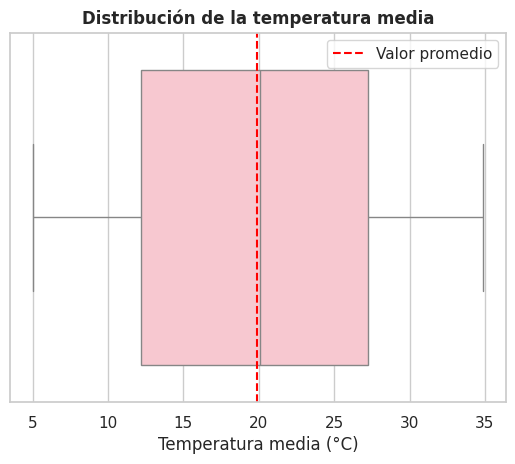

In [ ]:
#Boxplots para identificar los valores atípicos de la temperatura media global
boxplots_valores_atipicos('temperatura_media(°C)','Distribución de la temperatura media','Temperatura media (°C)')

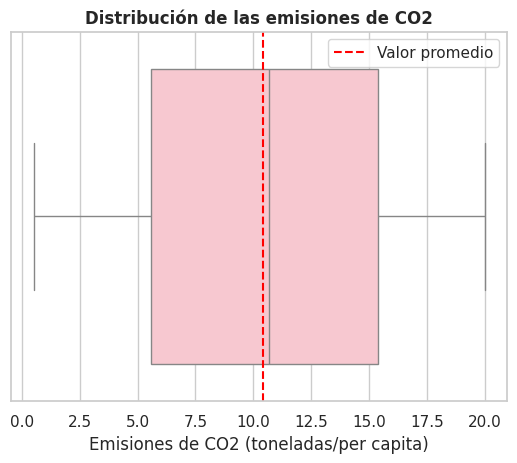

In [ ]:
#Boxplots para identificar los valores atípicos de las emisiones de co2
boxplots_valores_atipicos('emisiones_de_CO2_(toneladas/per_cápita)','Distribución de las emisiones de CO2','Emisiones de CO2 (toneladas/per capita)')

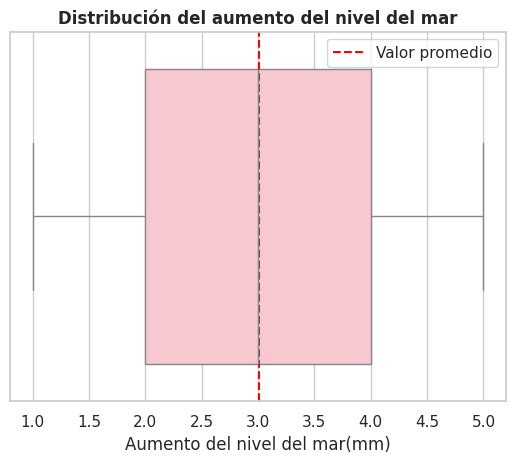

In [ ]:
#Boxplots para identificar los valores atípicos de las emisiones de co2
boxplots_valores_atipicos('aumento_del_nivel_del_mar(mm)','Distribución del aumento del nivel del mar','Aumento del nivel del mar(mm)')

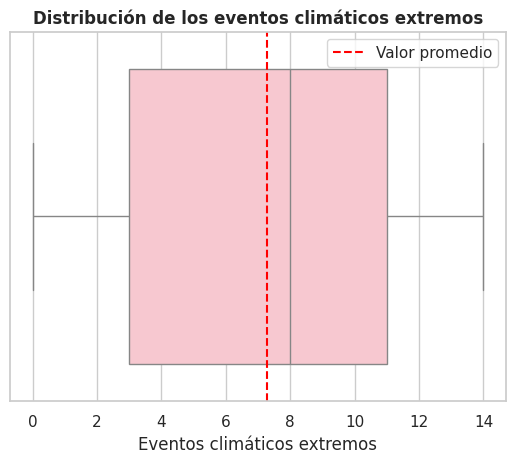

In [ ]:
#Boxplots para identificar los valores atípicos de los eventos climáticos extremos
boxplots_valores_atipicos('eventos_climaticos_extremos','Distribución de los eventos climáticos extremos','Eventos climáticos extremos')

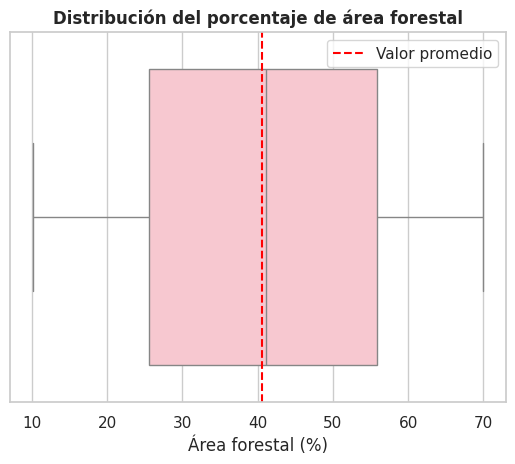

In [ ]:
#Boxplots para identificar los valores atípicos del porcentaje de área forestal
boxplots_valores_atipicos('area_forestal(%)','Distribución del porcentaje de área forestal','Área forestal (%)')

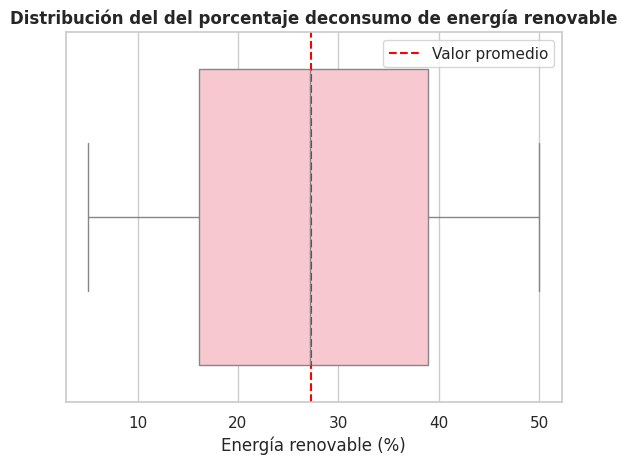

In [ ]:
#Boxplots para identificar los valores atípicos del porcentaje deconsumo de energía renovable
boxplots_valores_atipicos('energia_renovable(%)','Distribución del del porcentaje deconsumo de energía renovable','Energía renovable (%)')

# Valores atípicos

In [ ]:
def valores_atipicos(columna):
  Q1 = df[columna].quantile(0.25)
  Q3 = df[columna].quantile(0.75)
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR
  outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
  print(outliers)

In [ ]:
valores_atipicos('temperatura_media(°C)')
valores_atipicos('emisiones_de_CO2_(toneladas/per_cápita)')
valores_atipicos('aumento_del_nivel_del_mar(mm)')
valores_atipicos('area_forestal(%)')

Empty DataFrame
Columns: [año, pais, temperatura_media(°C), emisiones_de_CO2_(toneladas/per_cápita), aumento_del_nivel_del_mar(mm), precipitacion(mm), poblacion, energia_renovable(%), eventos_climaticos_extremos, area_forestal(%)]
Index: []
Empty DataFrame
Columns: [año, pais, temperatura_media(°C), emisiones_de_CO2_(toneladas/per_cápita), aumento_del_nivel_del_mar(mm), precipitacion(mm), poblacion, energia_renovable(%), eventos_climaticos_extremos, area_forestal(%)]
Index: []
Empty DataFrame
Columns: [año, pais, temperatura_media(°C), emisiones_de_CO2_(toneladas/per_cápita), aumento_del_nivel_del_mar(mm), precipitacion(mm), poblacion, energia_renovable(%), eventos_climaticos_extremos, area_forestal(%)]
Index: []
Empty DataFrame
Columns: [año, pais, temperatura_media(°C), emisiones_de_CO2_(toneladas/per_cápita), aumento_del_nivel_del_mar(mm), precipitacion(mm), poblacion, energia_renovable(%), eventos_climaticos_extremos, area_forestal(%)]
Index: []


# Tabla de frecuencias

In [ ]:
def tabla_de_frecuencias(data):
  columna = df[data]
  columna.max() - columna.min()
  segmentos = pd.cut(columna, 20)
  print(df[data].groupby(segmentos, observed=True).count())

In [ ]:
#Tabla de frecuencias temperatura media global
tabla_de_frecuencias('temperatura_media(°C)')
#Emisiones_de_CO2_(toneladas/cápita)
tabla_de_frecuencias('emisiones_de_CO2_(toneladas/per_cápita)')
#Aumento_del_nivel_del_mar(mm)
tabla_de_frecuencias('aumento_del_nivel_del_mar(mm)')
#Area_forestal(%)
tabla_de_frecuencias('area_forestal(%)')
#Energías renovables
tabla_de_frecuencias('energia_renovable(%)')
#Eventos climaticos extremos
tabla_de_frecuencias('eventos_climaticos_extremos')

temperatura_media(°C)
(4.97, 6.495]      46
(6.495, 7.99]      47
(7.99, 9.485]      51
(9.485, 10.98]     62
(10.98, 12.475]    51
(12.475, 13.97]    40
(13.97, 15.465]    49
(15.465, 16.96]    57
(16.96, 18.455]    49
(18.455, 19.95]    44
(19.95, 21.445]    49
(21.445, 22.94]    55
(22.94, 24.435]    59
(24.435, 25.93]    54
(25.93, 27.425]    47
(27.425, 28.92]    56
(28.92, 30.415]    50
(30.415, 31.91]    43
(31.91, 33.405]    37
(33.405, 34.9]     54
Name: temperatura_media(°C), dtype: int64
emisiones_de_CO2_(toneladas/per_cápita)
(0.48, 1.475]      58
(1.475, 2.45]      45
(2.45, 3.425]      46
(3.425, 4.4]       38
(4.4, 5.375]       52
(5.375, 6.35]      46
(6.35, 7.325]      38
(7.325, 8.3]       54
(8.3, 9.275]       45
(9.275, 10.25]     59
(10.25, 11.225]    62
(11.225, 12.2]     54
(12.2, 13.175]     48
(13.175, 14.15]    41
(14.15, 15.125]    54
(15.125, 16.1]     50
(16.1, 17.075]     59
(17.075, 18.05]    55
(18.05, 19.025]    53
(19.025, 20.0]     43
Name: emisiones_

# Histogramas

In [ ]:
#Histograma de la gravedad del ataque de ansiedad
def generar_histograma(columna,title,xlabel):
  sns.set(style = 'darkgrid')
  sns.histplot(data = df,x=columna, kde=False, stat="count", bins = 15, color='orange')
  plt.xlabel(xlabel, fontsize=12)
  plt.ylabel("Frecuencia", fontsize=11)
  plt.title(title, fontsize=12)
  plt.show()

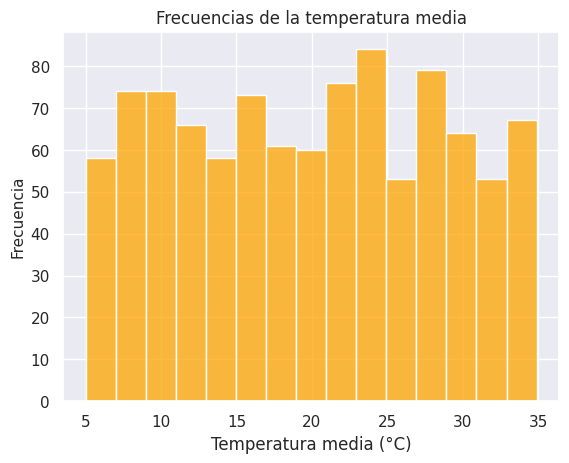

In [ ]:
generar_histograma('temperatura_media(°C)','Frecuencias de la temperatura media','Temperatura media (°C)')

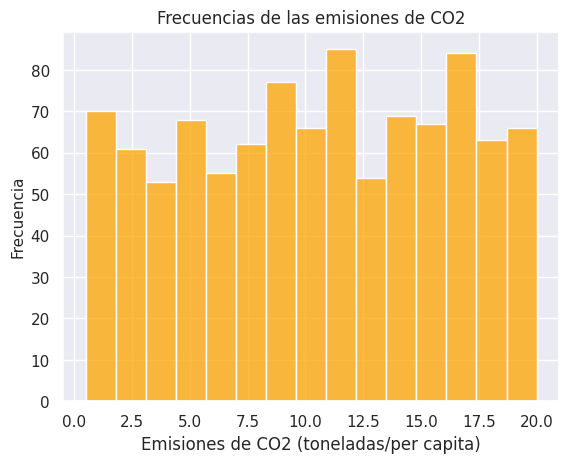

In [ ]:
generar_histograma('emisiones_de_CO2_(toneladas/per_cápita)','Frecuencias de las emisiones de CO2','Emisiones de CO2 (toneladas/per capita)')

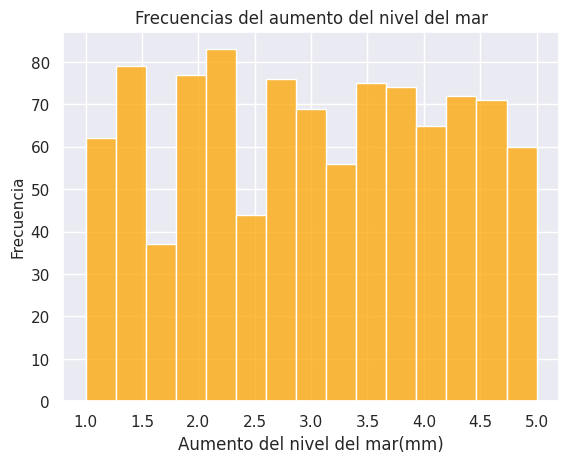

In [ ]:
generar_histograma('aumento_del_nivel_del_mar(mm)','Frecuencias del aumento del nivel del mar','Aumento del nivel del mar(mm)')

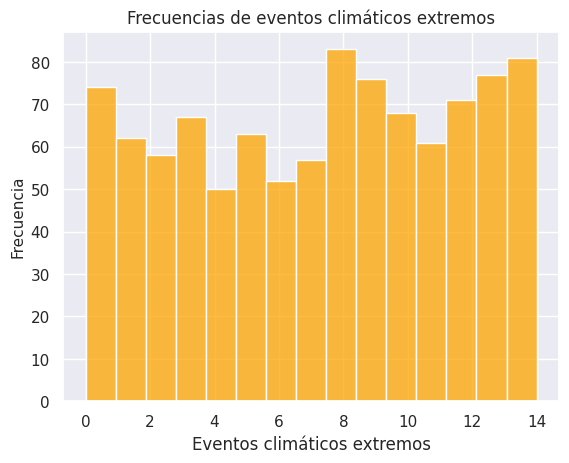

In [ ]:
generar_histograma('eventos_climaticos_extremos','Frecuencias de eventos climáticos extremos','Eventos climáticos extremos')

In [ ]:
def obtener_curtosis_y_asimetria(columna):
  columna = df[columna]
  print(f'Curtosis: {kurtosis(columna)}')
  print(f'Asimetría: {skew(columna)}')

In [ ]:
obtener_curtosis_y_asimetria('temperatura_media(°C)')

Curtosis: -1.1743854738639115
Asimetría: 0.0032678660881653577


In [ ]:
obtener_curtosis_y_asimetria('emisiones_de_CO2_(toneladas/per_cápita)')

Curtosis: -1.1680442675392582
Asimetría: -0.07742954590984177


In [ ]:
obtener_curtosis_y_asimetria('aumento_del_nivel_del_mar(mm)')

Curtosis: -1.1920024252878068
Asimetría: -0.02490277789647259


In [ ]:
obtener_curtosis_y_asimetria('eventos_climaticos_extremos')

Curtosis: -1.2221519215886196
Asimetría: -0.1109132619171542


# Gráficas de densidad

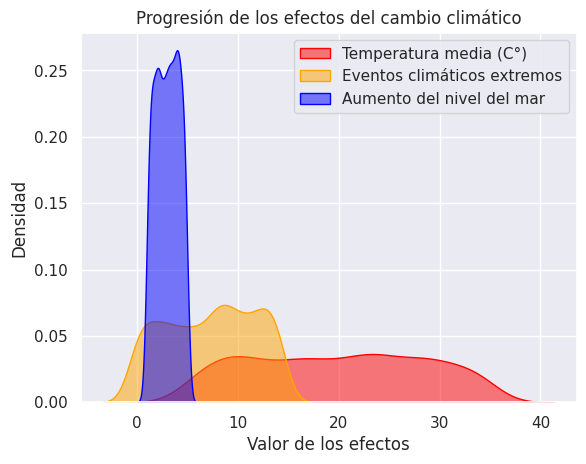

In [ ]:
#Gráficas de densidad
sns.kdeplot(data=df['temperatura_media(°C)'], label='Temperatura media (C°)', fill=True, color='red',alpha=0.5)
sns.kdeplot(data=df['eventos_climaticos_extremos'], label='Eventos climáticos extremos', fill=True, color='orange', alpha=0.5)
sns.kdeplot(data=df['aumento_del_nivel_del_mar(mm)'], label='Aumento del nivel del mar', fill=True, color='blue', alpha=0.5)

# Etiquetas y título
plt.title('Progresión de los efectos del cambio climático')
plt.xlabel('Valor de los efectos')
plt.ylabel('Densidad')
plt.legend()
plt.show()

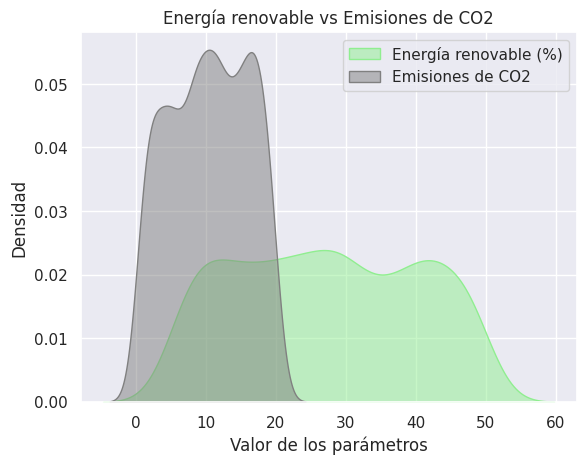

In [ ]:
#Gráficas de densidad
sns.kdeplot(data=df['energia_renovable(%)'], label='Energía renovable (%)', fill=True, color='lightgreen',alpha=0.5)
sns.kdeplot(data=df['emisiones_de_CO2_(toneladas/per_cápita)'], label='Emisiones de CO2', fill=True, color='gray', alpha=0.5)

# Etiquetas y título
plt.title('Energía renovable vs Emisiones de CO2')
plt.xlabel('Valor de los parámetros')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Gráficas de barras

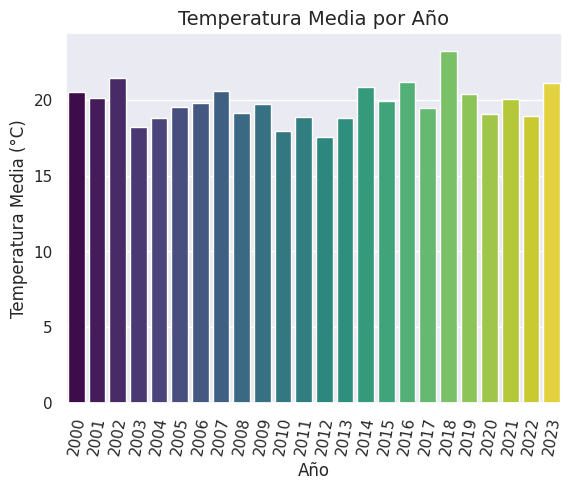

In [ ]:
#Gráficas de barras
df_agrupado = df.groupby('año')['temperatura_media(°C)'].mean().reset_index()
df_agrupado = df_agrupado.sort_values(by='temperatura_media(°C)', ascending=True)
ax = sns.barplot(x=df_agrupado['año'], y=df_agrupado['temperatura_media(°C)'], hue=df_agrupado['año'], palette='viridis')
ax.set_title('Temperatura Media por Año', fontsize=14)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Temperatura Media (°C)', fontsize=12)
plt.xticks(rotation=80)
ax.legend([],[], frameon=False)
plt.show()


In [ ]:
df_agrupado.sort_values(by='temperatura_media(°C)', ascending=True)

año  temperatura_media(°C)
12  2012              17.569048
10  2010              17.963333
3   2003              18.219512
4   2004              18.804000
13  2013              18.829032
11  2011              18.856818
22  2022              18.960000
20  2020              19.044186
8   2008              19.144444
17  2017              19.478125
5   2005              19.532432
9   2009              19.730303
6   2006              19.805128
15  2015              19.916279
21  2021              20.076087
1   2001              20.117073
19  2019              20.402500
0   2000              20.501887
7   2007              20.562500
14  2014              20.834091
23  2023              21.107143
16  2016              21.160784
2   2002              21.433333
18  2018              23.250000

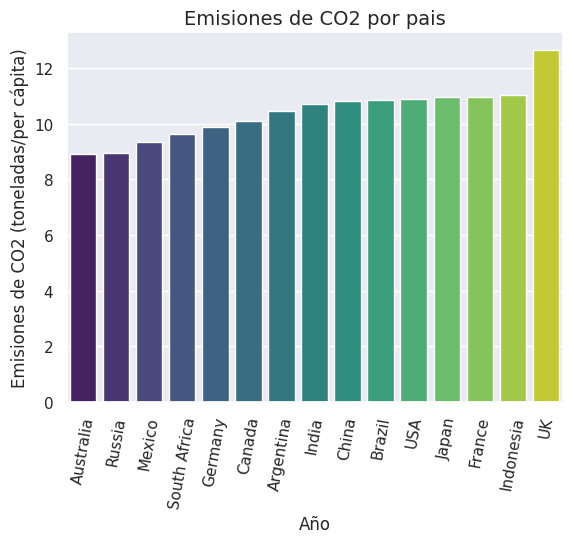

In [ ]:
#Gráficas de barras
df_agrupado = df.groupby('pais')['emisiones_de_CO2_(toneladas/per_cápita)'].mean().reset_index()
df_agrupado = df_agrupado.sort_values(by='emisiones_de_CO2_(toneladas/per_cápita)', ascending=True)
ax = sns.barplot(x=df_agrupado['pais'], y=df_agrupado['emisiones_de_CO2_(toneladas/per_cápita)'], hue=df_agrupado['pais'], palette='viridis')
ax.set_title('Emisiones de CO2 por pais', fontsize=14)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Emisiones de CO2 (toneladas/per cápita)', fontsize=12)
plt.xticks(rotation=80)
ax.legend([],[], frameon=False)
plt.show()


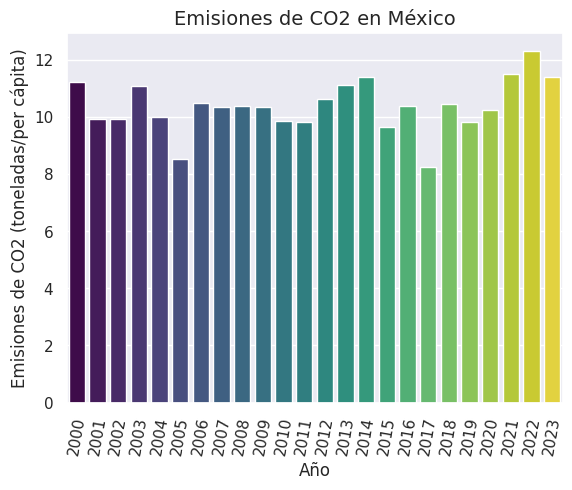

In [ ]:
#Gráficas de barras


df_agrupado = df[df['pais'] == 'Mexico']

df_agrupado = df.groupby('año')['emisiones_de_CO2_(toneladas/per_cápita)'].mean().reset_index()
ax = sns.barplot(x=df_agrupado['año'], y=df_agrupado['emisiones_de_CO2_(toneladas/per_cápita)'], hue=df_agrupado['año'], palette='viridis')
ax.set_title('Emisiones de CO2 en México', fontsize=14)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Emisiones de CO2 (toneladas/per cápita)', fontsize=12)
plt.xticks(rotation=80)
ax.legend([],[], frameon=False)
plt.show()


In [ ]:
df_agrupado.sort_values(by='emisiones_de_CO2_(toneladas/per_cápita)', ascending=True)

año  emisiones_de_CO2_(toneladas/per_cápita)
17  2017                                 8.234375
5   2005                                 8.537838
15  2015                                 9.667442
11  2011                                 9.809091
19  2019                                 9.812500
10  2010                                 9.873333
1   2001                                 9.929268
2   2002                                 9.933333
4   2004                                10.000000
20  2020                                10.246512
7   2007                                10.335000
9   2009                                10.363636
8   2008                                10.375000
16  2016                                10.398039
18  2018                                10.443478
6   2006                                10.497436
12  2012                                10.640476
3   2003                                11.085366
13  2013                                11.135484
0   2000                                11.224528
23  2023                                11.402381
14  2014                                11.409091
21  2021                                11.521739
22  2022                                12.326667

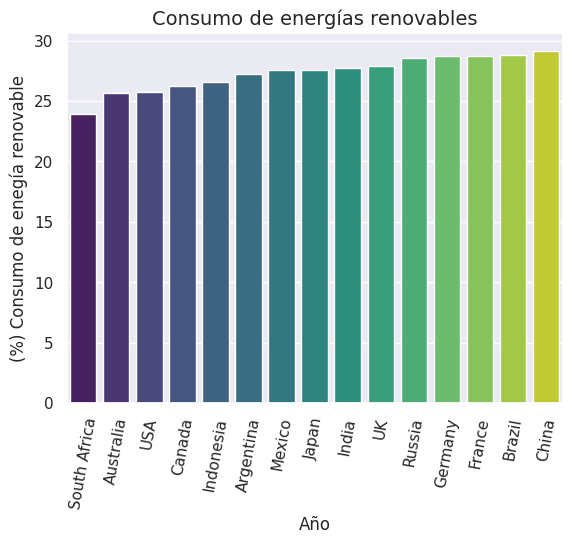

In [ ]:
df_agrupado = df.groupby('pais')['energia_renovable(%)'].mean().reset_index()
df_agrupado = df_agrupado.sort_values(by='energia_renovable(%)', ascending=True)
ax = sns.barplot(x=df_agrupado['pais'], y=df_agrupado['energia_renovable(%)'], hue=df_agrupado['pais'], palette='viridis')
ax.set_title('Consumo de energías renovables', fontsize=14)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('(%) Consumo de enegía renovable', fontsize=12)
plt.xticks(rotation=80)
ax.legend([],[], frameon=False)
plt.show()

# Tabla de contingencia

In [ ]:
#Tablas de contingencia para los eventos climáticos extremos
crosstab = pd.crosstab(df['pais'], df['eventos_climaticos_extremos'], margins=True, margins_name='Total')
crosstab


eventos_climaticos_extremos   0   1   2   3   4   5   6   7   8   9  10  11  \
pais                                                                          
Argentina                     7   4   5   6   4   2   3   5   8   2   6   3   
Australia                     2   7   1   3   6   7   6   3   5   3   1   0   
Brazil                        6   4   2   4   4   8   2   8   5   5   3   3   
Canada                        5   5   3   6   3   5   2   4   5   5   4   3   
China                         8   4   2   4   2   6   4   1   2   9   3   3   
France                        1   4   2   8   2   3   3   1   4   4   5   7   
Germany                       7   4   2   6   2   3   3   2   7   3   9   4   
India                         6   4   3   3   1   3   2   5  15   5   2   3   
Indonesia                     4   4   6   6   4   2   4   4   5   7   5   6   
Japan                         2   7   2   5   3   1   4   1   5   6   3   7   
Mexico                        9   1   5   3   2   4   1   4   4   6   5   4   
Russia                        1   4  11   4   4   5   4   3   5   4   4   5   
South Africa                  5   6   1   3   6   8   4   9   3   8   5   1   
UK                            5   3   4   3   3   3   3   4   3   4   6   9   
USA                           6   1   9   3   4   3   7   3   7   5   7   3   
Total                        74  62  58  67  50  63  52  57  83  76  68  61   

eventos_climaticos_extremos  12  13  14  Total  
pais                                            
Argentina                     5   3   4     67  
Australia                     5   3   5     57  
Brazil                        4   5   4     67  
Canada                        6   1  10     67  
China                         6   8   5     67  
France                        3   8  11     66  
Germany                       0   7   2     61  
India                         7   9   2     70  
Indonesia                     6   6   6     75  
Japan                         6   6   5     63  
Mexico                        2   2   3     55  
Russia                       10   1   9     74  
South Africa                  2   7   5     73  
UK                            5   6   4     65  
USA                           4   5   6     73  
Total                        71  77  81   1000

In [ ]:
#Cantidad eventos climaticos en rusia
df_rusia = df[df['pais'] == 'Russia']
df_rusia['eventos_climaticos_extremos'].sum()

554

In [ ]:
#eventos climaticos por pais
df_eventos_climaticos = df.groupby('pais')['eventos_climaticos_extremos'].sum().reset_index()
df_eventos_climaticos = df_eventos_climaticos.sort_values(by='eventos_climaticos_extremos', ascending=True)
df_eventos_climaticos

pais  eventos_climaticos_extremos
10        Mexico                          354
1      Australia                          380
6        Germany                          417
0      Argentina                          441
2         Brazil                          461
3         Canada                          489
4          China                          495
9          Japan                          495
13            UK                          506
12  South Africa                          510
14           USA                          523
7          India                          532
11        Russia                          554
8      Indonesia                          565
5         France                          569

<ipython-input-53-93c625a5f3a6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crosstab.columns, y=crosstab.loc['Mexico'], ax=axes[0, 0], palette='crest')
<ipython-input-53-93c625a5f3a6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crosstab.columns, y=crosstab.loc['Australia'], ax=axes[0, 1], palette='crest')
<ipython-input-53-93c625a5f3a6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crosstab.columns, y=crosstab.loc['Brazil'], ax=axes[0, 2], palette='crest')
<ipython-input-53-93c625a5f3a6>:9: FutureWarning: 

Passing `palett

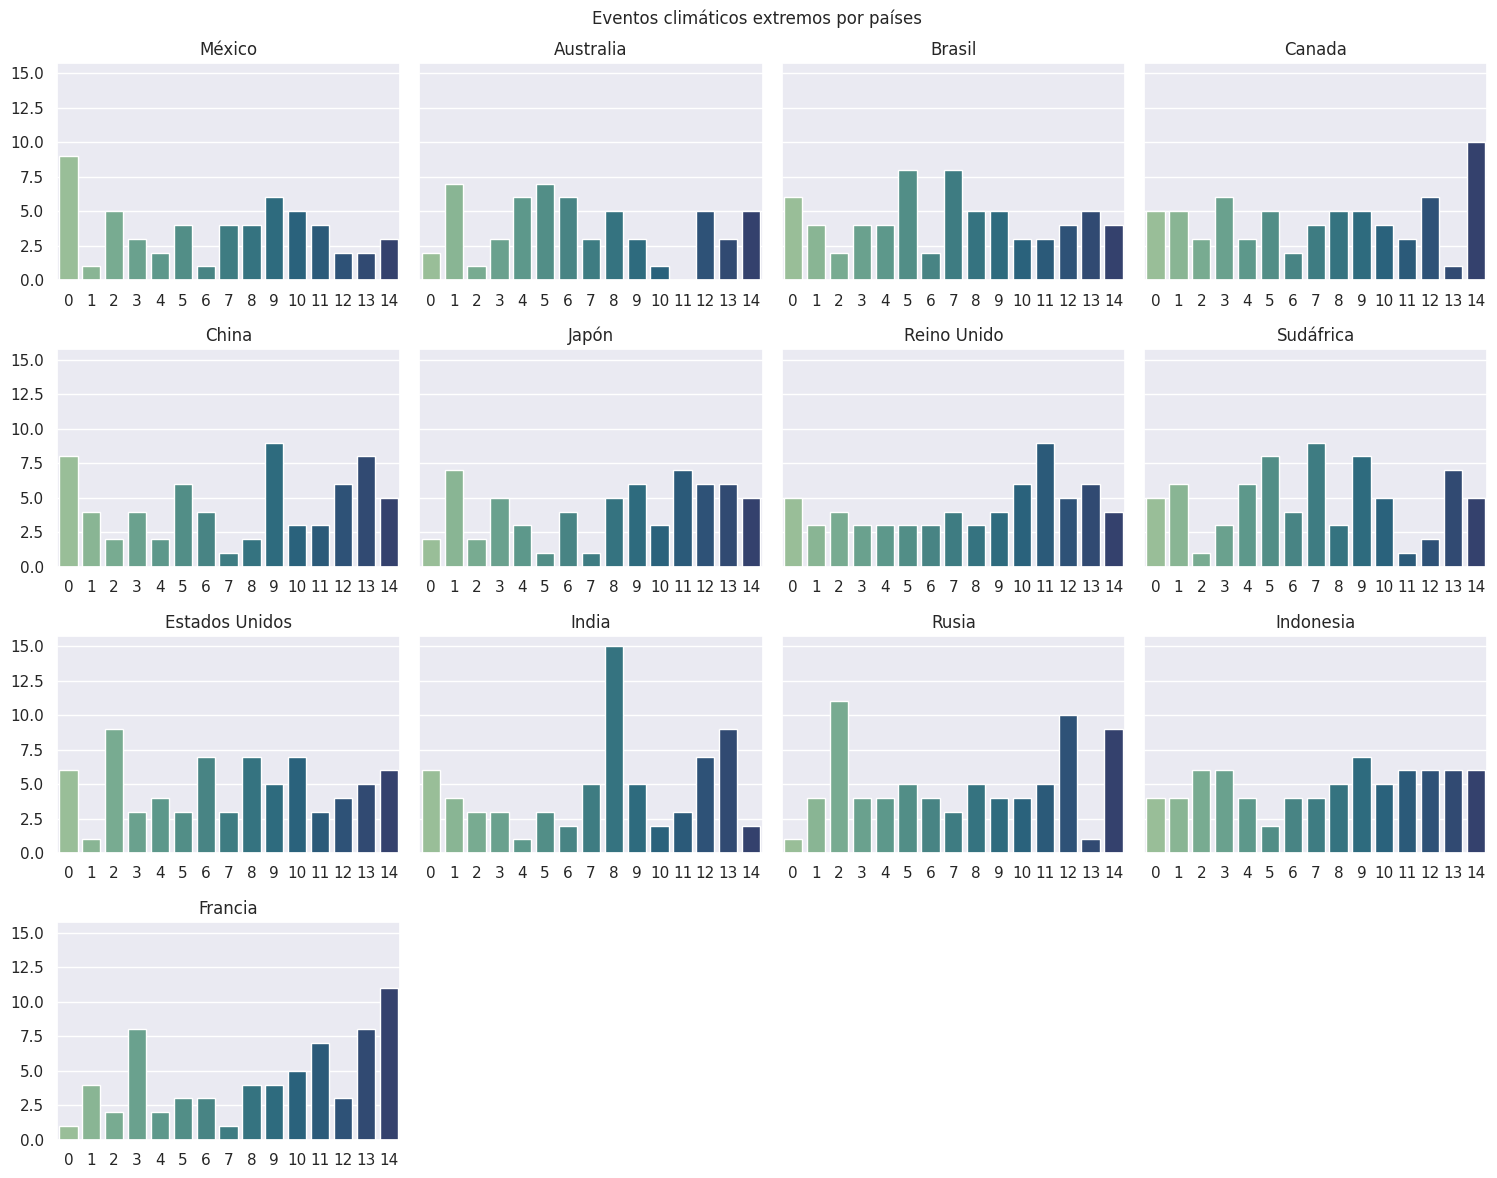

In [ ]:
crosstab = pd.crosstab(df['pais'], df['eventos_climaticos_extremos'])
crosstab.stack(level=0)
#Múltiples graficas
fig, axes = plt.subplots(4, 4, figsize=(15, 12), sharex=False, sharey=True)

sns.barplot(x=crosstab.columns, y=crosstab.loc['Mexico'], ax=axes[0, 0], palette='crest')
sns.barplot(x=crosstab.columns, y=crosstab.loc['Australia'], ax=axes[0, 1], palette='crest')
sns.barplot(x=crosstab.columns, y=crosstab.loc['Brazil'], ax=axes[0, 2], palette='crest')
sns.barplot(x=crosstab.columns, y=crosstab.loc['Canada'], ax=axes[0, 3], palette='crest')
sns.barplot(x=crosstab.columns, y=crosstab.loc['China'], ax=axes[1, 0], palette='crest')
sns.barplot(x=crosstab.columns, y=crosstab.loc['Japan'], ax=axes[1, 1], palette='crest')
sns.barplot(x=crosstab.columns, y=crosstab.loc['UK'], ax=axes[1, 2], palette='crest')
sns.barplot(x=crosstab.columns, y=crosstab.loc['South Africa'], ax=axes[1, 3], palette='crest')
sns.barplot(x=crosstab.columns, y=crosstab.loc['USA'], ax=axes[2, 0], palette='crest')
sns.barplot(x=crosstab.columns, y=crosstab.loc['India'], ax=axes[2, 1], palette='crest')
sns.barplot(x=crosstab.columns, y=crosstab.loc['Russia'], ax=axes[2, 2], palette='crest')
sns.barplot(x=crosstab.columns, y=crosstab.loc['Indonesia'], ax=axes[2, 3], palette='crest')
sns.barplot(x=crosstab.columns, y=crosstab.loc['France'], ax=axes[3, 0], palette='crest')

axes[0, 0].set(xlabel='', ylabel='', title='México')
axes[0, 1].set(xlabel='', ylabel='', title='Australia')
axes[0, 2].set(xlabel='', ylabel='', title='Brasil')
axes[0, 3].set(xlabel='', ylabel='', title='Canada')
axes[1, 0].set(xlabel='', ylabel='', title='China')
axes[1, 1].set(xlabel='', ylabel='', title='Japón')
axes[1, 2].set(xlabel='', ylabel='', title='Reino Unido')
axes[1, 3].set(xlabel='', ylabel='', title='Sudáfrica')
axes[2, 0].set(xlabel='', ylabel='', title='Estados Unidos')
axes[2, 1].set(xlabel='', ylabel='', title='India')
axes[2, 2].set(xlabel='', ylabel='', title='Rusia')
axes[2, 3].set(xlabel='', ylabel='', title='Indonesia')
axes[3, 0].set(xlabel='', ylabel='', title='Francia')

axes[3, 1].axis('off')
axes[3, 2].axis('off')
axes[3, 3].axis('off')

fig.suptitle('Eventos climáticos extremos por países', fontsize=12)
plt.tight_layout()
plt.show()

# Boxplots con variables categóticas

In [ ]:
#Boxplots con variables categoricas
df_eventos = df.groupby(level=0)[['eventos_climaticos_extremos']].mean()
pais = df.groupby(level=0)['pais'].last()
merged = df_eventos.merge(pais, left_index=True, right_index=True)
merged

eventos_climaticos_extremos       pais
0                           14.0         UK
1                            8.0        USA
2                            9.0     France
3                            7.0  Argentina
4                            4.0    Germany
..                           ...        ...
995                          8.0      India
996                         14.0         UK
997                         10.0  Argentina
998                          3.0  Australia
999                          3.0    Germany

[1000 rows x 2 columns]

<ipython-input-55-9c84c5d2720d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged, x='pais', y='eventos_climaticos_extremos', palette='hls')


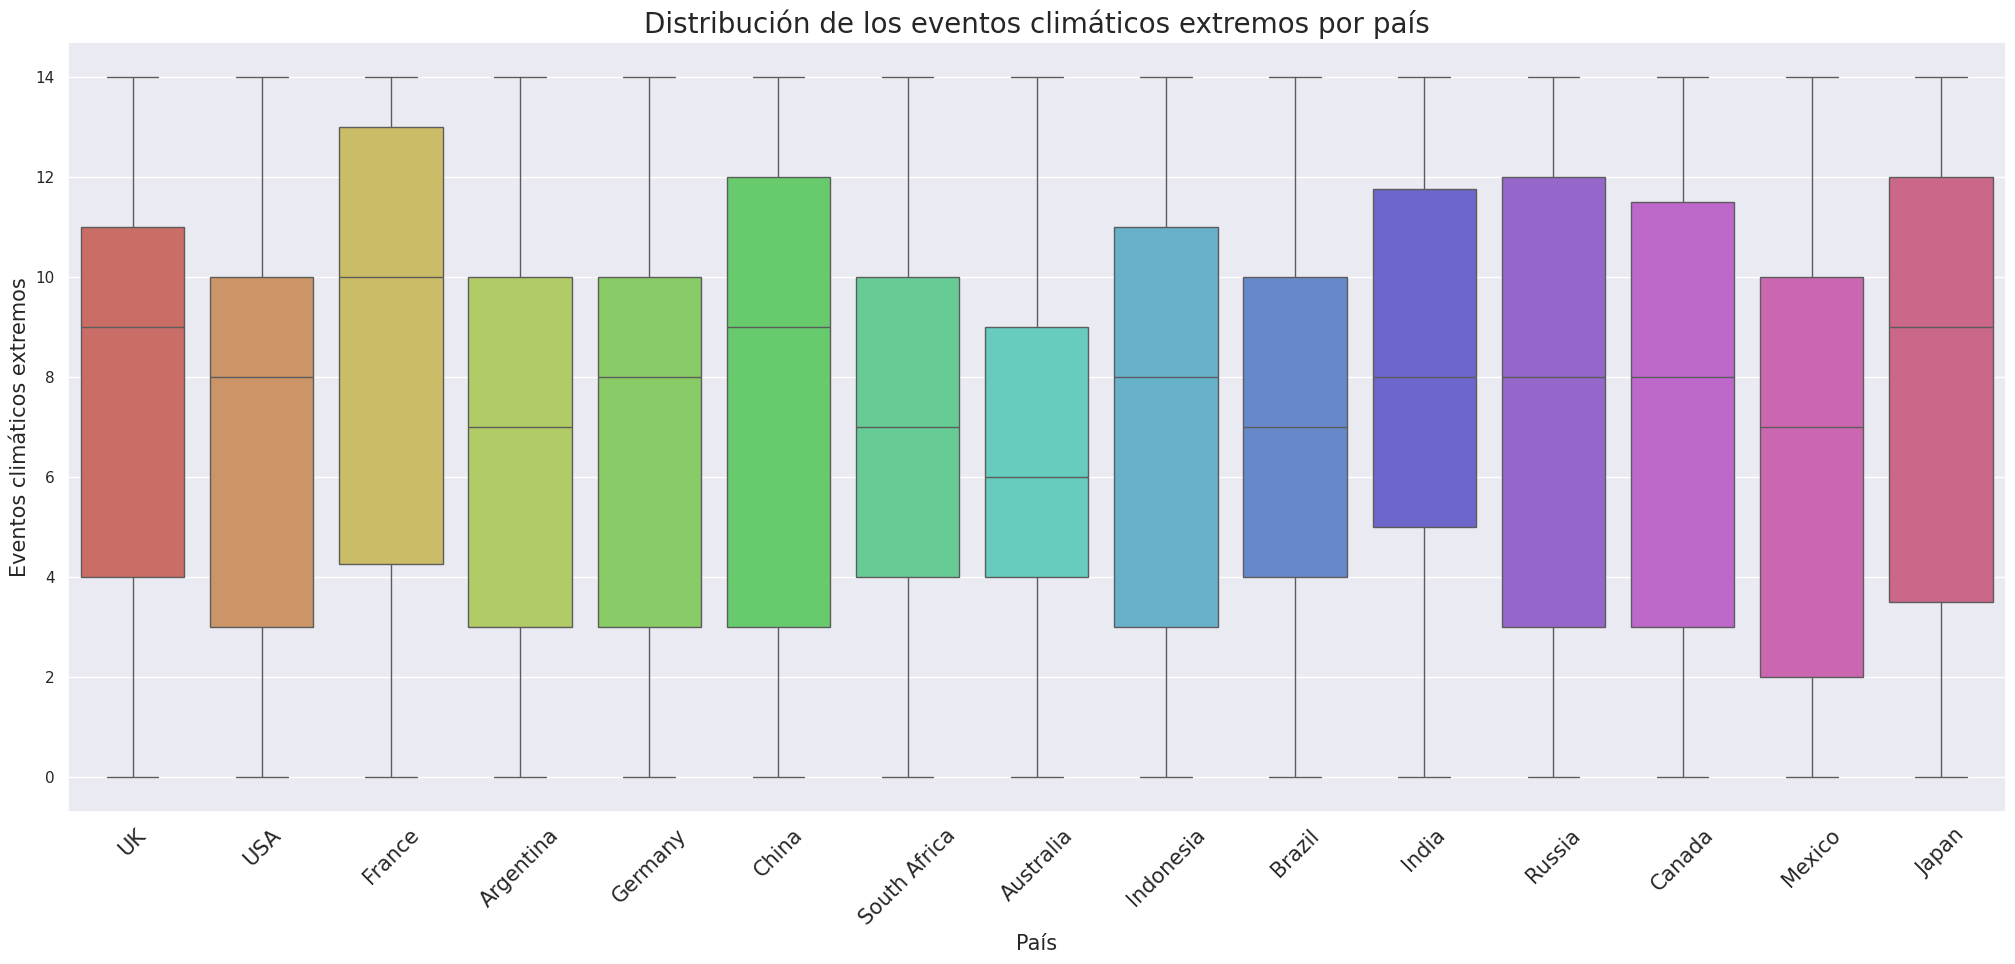

In [ ]:
#Generar boxplots con variables categoricas
plt.figure(figsize=(25, 10))
sns.boxplot(data=merged, x='pais', y='eventos_climaticos_extremos', palette='hls')
plt.xticks(rotation=45,fontsize=15)
plt.xlabel('País',fontsize=15)
plt.ylabel('Eventos climáticos extremos',fontsize=15)
plt.title('Distribución de los eventos climáticos extremos por país', fontsize=20)
plt.show()

<ipython-input-56-dc2c3371aa5f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=merged, x='año', y='aumento_del_nivel_del_mar(mm)', palette='hls')


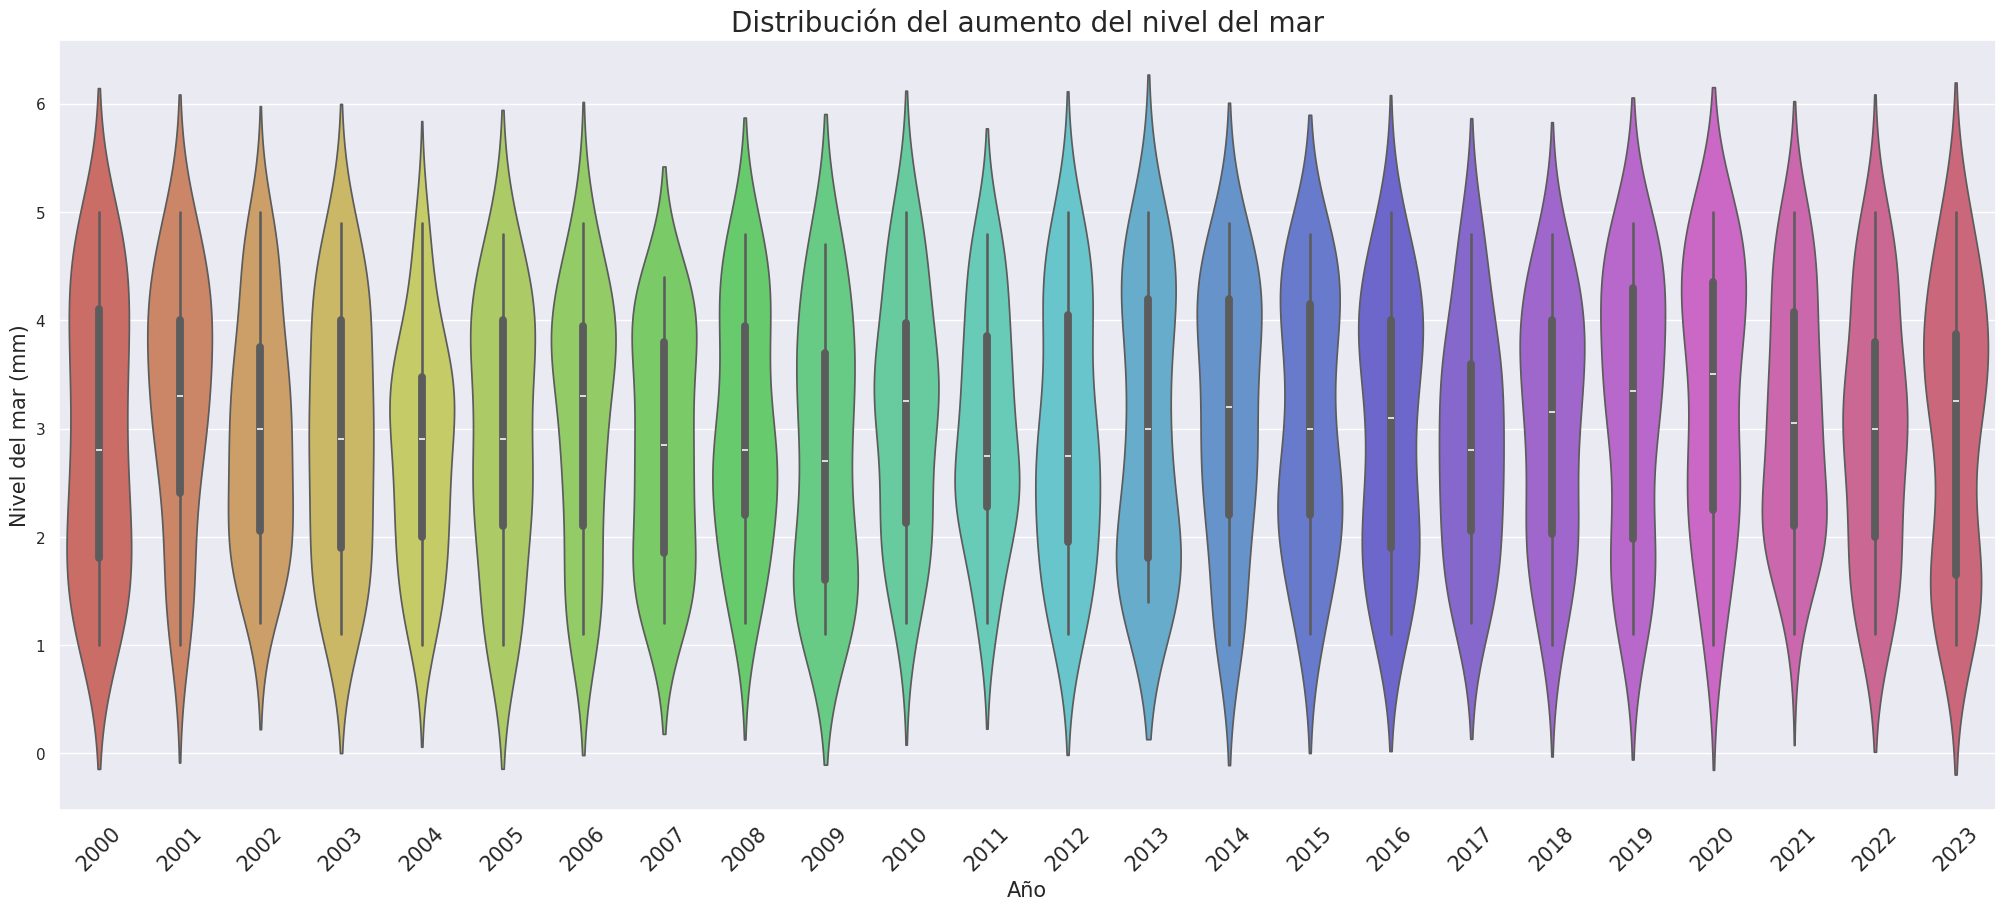

In [ ]:
df_nivel_mar = df.groupby(level=0)[['aumento_del_nivel_del_mar(mm)']].mean()
anio = df.groupby(level=0)['año'].last()
merged = df_nivel_mar.merge(anio, left_index=True, right_index=True)

#Violinplot con variables categoricas
plt.figure(figsize=(25, 10))
sns.violinplot(data=merged, x='año', y='aumento_del_nivel_del_mar(mm)', palette='hls')
plt.xticks(rotation=45,fontsize=15)
plt.xlabel('Año',fontsize=15)
plt.ylabel('Nivel del mar (mm)',fontsize=15)
plt.title('Distribución del aumento del nivel del mar', fontsize=20)
plt.show()

# Correlaciones

In [ ]:
#Matriz de correlaciones
#Remover la variabñes dependiente
df_filtered = df.drop(columns=['pais','año'])
no_zeros = df_filtered[df_filtered > 0]
no_zeros.corr()

temperatura_media(°C)  \
temperatura_media(°C)                                 1.000000   
emisiones_de_CO2_(toneladas/per_cápita)               0.012323   
aumento_del_nivel_del_mar(mm)                         0.059005   
precipitacion(mm)                                    -0.004532   
poblacion                                             0.003550   
energia_renovable(%)                                 -0.065472   
eventos_climaticos_extremos                           0.049267   
area_forestal(%)                                     -0.017027   

                                         emisiones_de_CO2_(toneladas/per_cápita)  \
temperatura_media(°C)                                                   0.012323   
emisiones_de_CO2_(toneladas/per_cápita)                                 1.000000   
aumento_del_nivel_del_mar(mm)                                          -0.038815   
precipitacion(mm)                                                       0.013306   
poblacion                                                               0.011529   
energia_renovable(%)                                                   -0.023355   
eventos_climaticos_extremos                                            -0.013592   
area_forestal(%)                                                        0.031387   

                                         aumento_del_nivel_del_mar(mm)  \
temperatura_media(°C)                                         0.059005   
emisiones_de_CO2_(toneladas/per_cápita)                      -0.038815   
aumento_del_nivel_del_mar(mm)                                 1.000000   
precipitacion(mm)                                             0.022104   
poblacion                                                    -0.000277   
energia_renovable(%)                                          0.003655   
eventos_climaticos_extremos                                   0.032400   
area_forestal(%)                                             -0.028670   

                                         precipitacion(mm)  poblacion  \
temperatura_media(°C)                            -0.004532   0.003550   
emisiones_de_CO2_(toneladas/per_cápita)           0.013306   0.011529   
aumento_del_nivel_del_mar(mm)                     0.022104  -0.000277   
precipitacion(mm)                                 1.000000   0.009254   
poblacion                                         0.009254   1.000000   
energia_renovable(%)                             -0.005641   0.001785   
eventos_climaticos_extremos                      -0.037026   0.009532   
area_forestal(%)                                  0.018571  -0.011638   

                                         energia_renovable(%)  \
temperatura_media(°C)                               -0.065472   
emisiones_de_CO2_(toneladas/per_cápita)             -0.023355   
aumento_del_nivel_del_mar(mm)                        0.003655   
precipitacion(mm)                                   -0.005641   
poblacion                                            0.001785   
energia_renovable(%)                                 1.000000   
eventos_climaticos_extremos                         -0.013334   
area_forestal(%)                                    -0.021138   

                                         eventos_climaticos_extremos  \
temperatura_media(°C)                                       0.049267   
emisiones_de_CO2_(toneladas/per_cápita)                    -0.013592   
aumento_del_nivel_del_mar(mm)                               0.032400   
precipitacion(mm)                                          -0.037026   
poblacion                                                   0.009532   
energia_renovable(%)                                       -0.013334   
eventos_climaticos_extremos                                 1.000000   
area_forestal(%)                                            0.001927   

                                         area_forestal(%)  
temperatura_media(°C)                           -0.017027  
emisiones

In [ ]:
#Mínimo valor de la correlación
minimo_correlacion = print(no_zeros.corr().min().min())
#Máximo valor de la correlación
maximo_correlacion = print(no_zeros.corr().max().max())

-0.06547188492302165
1.0


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'temperatura_media(°C)'),
  Text(0, 1.5, 'emisiones_de_CO2_(toneladas/per_cápita)'),
  Text(0, 2.5, 'aumento_del_nivel_del_mar(mm)'),
  Text(0, 3.5, 'precipitacion(mm)'),
  Text(0, 4.5, 'poblacion'),
  Text(0, 5.5, 'energia_renovable(%)'),
  Text(0, 6.5, 'eventos_climaticos_extremos'),
  Text(0, 7.5, 'area_forestal(%)')])

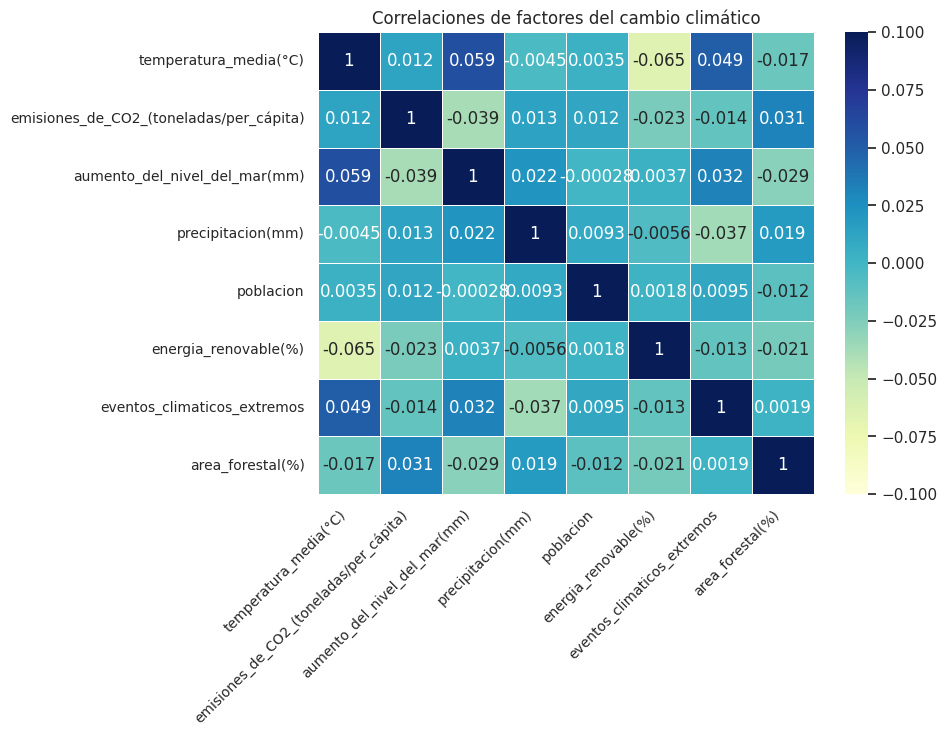

In [ ]:
#Generar mapa de calor
plt.figure(figsize=(8, 6))
ax = sns.heatmap(no_zeros.corr(), vmin=-0.1, vmax=0.1, annot=True, cmap="YlGnBu", linewidths=.5)
ax.set_title('Correlaciones de factores del cambio climático', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

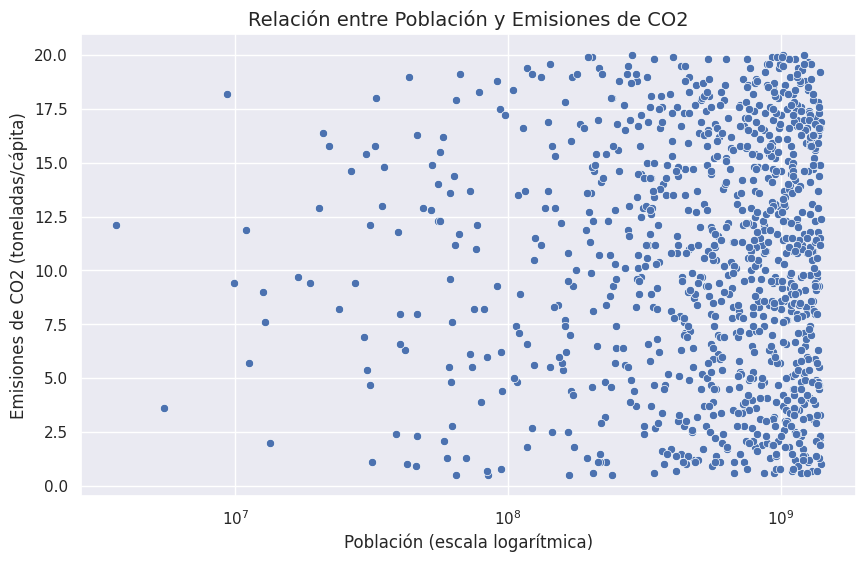

In [ ]:
#Gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=no_zeros['poblacion'], y=no_zeros['emisiones_de_CO2_(toneladas/per_cápita)'])

# Usar escala logarítmica para el eje X (población)
plt.xscale('log')

# Título y etiquetas
plt.title('Relación entre Población y Emisiones de CO2', fontsize=14)
plt.xlabel('Población (escala logarítmica)', fontsize=12)
plt.ylabel('Emisiones de CO2 (toneladas/cápita)', fontsize=12)

plt.show()

# Pairplot

In [ ]:
#Eliminar variables para mejor visualización del gráfico pairplot
pairplot = no_zeros.drop(columns=['precipitacion(mm)','area_forestal(%)'])

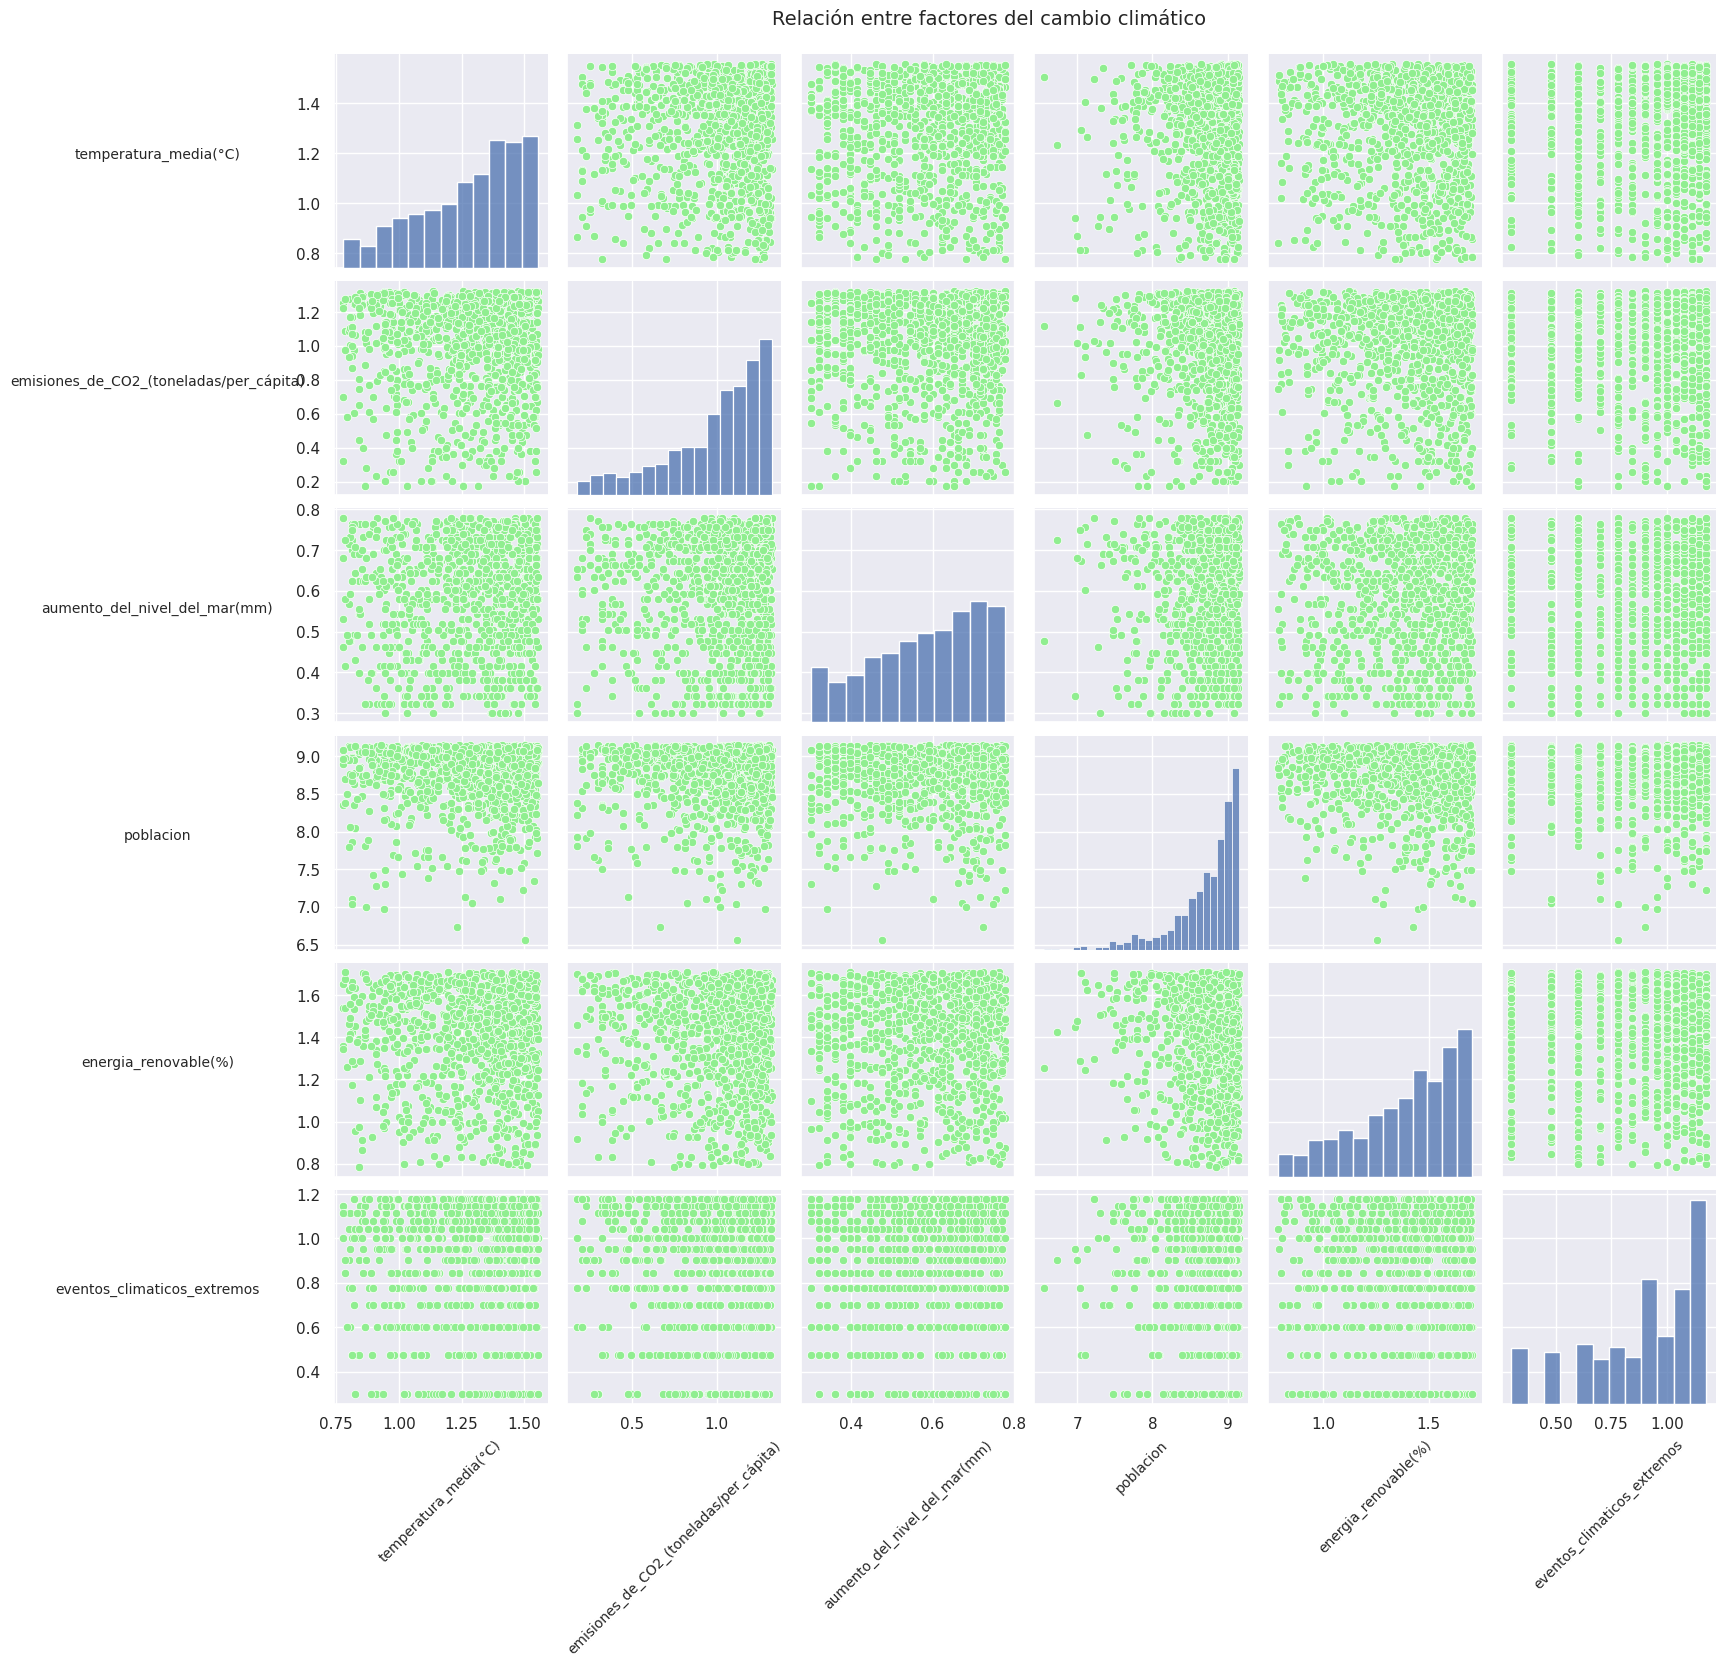

In [ ]:
# Definir las variables a las que se les aplicará escala logarítmica
log_vars = ['emisiones_de_CO2_(toneladas/per_cápita)', 'poblacion', 'aumento_del_nivel_del_mar(mm)','temperatura_media(°C)','energia_renovable(%)','eventos_climaticos_extremos']

# Aplicar logaritmo a las variables seleccionadas para mejorar la visualización
no_zeros_log = pairplot.copy()
for var in log_vars:
    no_zeros_log[var] = np.log10(no_zeros_log[var] + 1)  # Se suma 1 para evitar log(0)

# Crear el pairplot con escala logarítmica en ciertas variables
g=sns.pairplot(no_zeros_log, plot_kws={'color': 'lightgreen'})

# Rotar nombres de variables en los ejes X e Y
for ax in g.axes.flatten():
    if ax is not None:
        ax.set_xlabel(ax.get_xlabel(), fontsize=10, rotation=45)
        ax.set_ylabel(ax.get_ylabel(), fontsize=10, rotation=0, labelpad=100)

plt.suptitle("Relación entre factores del cambio climático", fontsize=14)
plt.subplots_adjust(top=0.95)
# Mostrar la gráfica
plt.show()



In [ ]:
df['pais'].unique()


array(['UK', 'USA', 'France', 'Argentina', 'Germany', 'China',
       'South Africa', 'Australia', 'Indonesia', 'Brazil', 'India',
       'Russia', 'Canada', 'Mexico', 'Japan'], dtype=object)

# Mapas coropléticos

In [ ]:
#Mapa cloroplético
# Cargar datos
ruta_paises = userdata.get('ruta_paises')
paises_geo = ruta_paises
area_forestal_data = df.groupby('pais')['area_forestal(%)'].mean().reset_index()

# Crear el mapa
m = folium.Map(location=[35, -5], zoom_start=2.2, width='100%', height='96%')
# Añadir título
title_html = '''
    <h3 align="center" style="font-size:20px"><b>Porcentaje de Área Forestal (%) por País (2000 - 2023)</b></h3>
'''
m.get_root().html.add_child(folium.Element(title_html))

# Añadir la capa Choropleth
folium.Choropleth(
    geo_data=paises_geo,  # Aquí debes pasar el archivo geojson
    name='choropleth',
    data=area_forestal_data,  # Aquí pasa el dataframe con los datos
    columns=['pais', 'area_forestal(%)'],
    key_on='feature.properties.pais',  # Ajusta esto según la propiedad que se utiliza como clave en el geojson
    fill_color='viridis',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Área forestal (%)'
).add_to(m)

# Añadir el control de capas
folium.LayerControl().add_to(m)

# Mostrar el mapa
m


In [ ]:
area_forestal_data = df.groupby('pais')['area_forestal(%)'].mean().reset_index()
area_forestal_data.sort_values(by='area_forestal(%)', ascending=True)

pais  area_forestal(%)
9          Japan         38.120635
11        Russia         38.509459
14           USA         38.534247
0      Argentina         38.832836
7          India         38.990000
5         France         39.496970
2         Brazil         39.774627
8      Indonesia         40.524000
1      Australia         40.852632
12  South Africa         41.072603
3         Canada         41.932836
6        Germany         42.598361
13            UK         42.718462
10        Mexico         43.376364
4          China         44.302985

In [ ]:
#Mapa cloroplético
# Cargar datos
ruta_paises = userdata.get('ruta_paises')
paises_geo = ruta_paises
energia_renovable_data = df.groupby('pais')['energia_renovable(%)'].mean().reset_index()

# Crear el mapa
m = folium.Map(location=[35, -5], zoom_start=2.2, width='100%', height='96%')
# Añadir título
title_html = '''
    <h3 align="center" style="font-size:20px"><b>Porcentaje de consumo de energía renovable por País (2000 - 2023)</b></h3>
'''
m.get_root().html.add_child(folium.Element(title_html))

# Añadir la capa Choropleth
folium.Choropleth(
    geo_data=paises_geo,  # Aquí debes pasar el archivo geojson
    name='choropleth',
    data=energia_renovable_data,  # Aquí pasa el dataframe con los datos
    columns=['pais', 'energia_renovable(%)'],
    key_on='feature.properties.pais',  # Ajusta esto según la propiedad que se utiliza como clave en el geojson
    fill_color='viridis',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Energía renovable (%)'
).add_to(m)

# Añadir el control de capas
folium.LayerControl().add_to(m)

# Mostrar el mapa
m


In [ ]:
energia_renovable_data = df.groupby('pais')['energia_renovable(%)'].mean().reset_index()
energia_renovable_data.sort_values(by='energia_renovable(%)', ascending=True)


pais  energia_renovable(%)
12  South Africa             23.915068
1      Australia             25.624561
14           USA             25.715068
3         Canada             26.244776
8      Indonesia             26.529333
0      Argentina             27.261194
10        Mexico             27.523636
9          Japan             27.560317
7          India             27.694286
13            UK             27.920000
11        Russia             28.514865
6        Germany             28.713115
5         France             28.739394
2         Brazil             28.786567
4          China             29.129851

In [ ]:
#Mapa cloroplético
# Cargar datos
ruta_paises = userdata.get('ruta_paises')
paises_geo = ruta_paises
emisiones_co2_data = df.groupby('pais')['emisiones_de_CO2_(toneladas/per_cápita)'].mean().reset_index()

# Crear el mapa
m = folium.Map(location=[35, -5], zoom_start=2.2, width='100%', height='96%')
# Añadir título
title_html = '''
    <h3 align="center" style="font-size:20px"><b>Porcentaje de emisiones de CO2 por País (2000 - 2023)</b></h3>
'''
m.get_root().html.add_child(folium.Element(title_html))

# Añadir la capa Choropleth
folium.Choropleth(
    geo_data=paises_geo,  # Aquí debes pasar el archivo geojson
    name='choropleth',
    data=emisiones_co2_data,  # Aquí pasa el dataframe con los datos
    columns=['pais', 'emisiones_de_CO2_(toneladas/per_cápita)'],
    key_on='feature.properties.pais',  # Ajusta esto según la propiedad que se utiliza como clave en el geojson
    fill_color='viridis',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Emisiones de CO2 (toneladas/per cápita)'
).add_to(m)

# Añadir el control de capas
folium.LayerControl().add_to(m)

# Mostrar el mapa
m


In [ ]:
emisiones_co2_data = df.groupby('pais')['emisiones_de_CO2_(toneladas/per_cápita)'].mean().reset_index()
emisiones_co2_data.sort_values(by='emisiones_de_CO2_(toneladas/per_cápita)', ascending=True)

pais  emisiones_de_CO2_(toneladas/per_cápita)
1      Australia                                 8.900000
11        Russia                                 8.967568
10        Mexico                                 9.347273
12  South Africa                                 9.617808
6        Germany                                 9.880328
3         Canada                                10.113433
0      Argentina                                10.447761
7          India                                10.694286
4          China                                10.835821
2         Brazil                                10.838806
14           USA                                10.882192
9          Japan                                10.960317
5         France                                10.966667
8      Indonesia                                11.021333
13            UK                                12.650769

# Regresión lineal

In [ ]:
#Regresión lineal simple emisiones co2 -> temperatura_media_global
df_regresion = df[['emisiones_de_CO2_(toneladas/per_cápita)', 'temperatura_media(°C)']]
df.isna().sum()

año                                        0
pais                                       0
temperatura_media(°C)                      0
emisiones_de_CO2_(toneladas/per_cápita)    0
aumento_del_nivel_del_mar(mm)              0
precipitacion(mm)                          0
poblacion                                  0
energia_renovable(%)                       0
eventos_climaticos_extremos                0
area_forestal(%)                           0
dtype: int64

In [ ]:
df_regresion = df_regresion[df_regresion > 0]

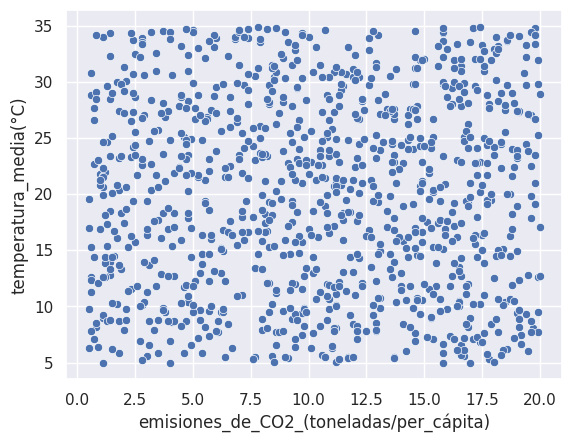

In [ ]:
sns.scatterplot(x=df_regresion['emisiones_de_CO2_(toneladas/per_cápita)'], y=df_regresion['temperatura_media(°C)']);

In [ ]:
df_regresion['emisiones_de_CO2_(toneladas/per_cápita)'].corr(df_regresion['temperatura_media(°C)'])

0.01232338061377081

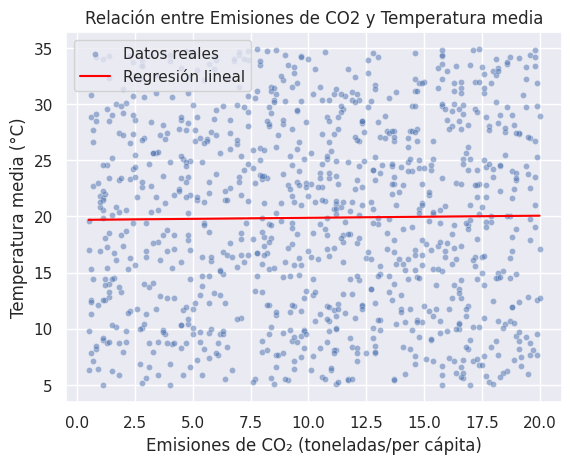

In [ ]:
lr = LinearRegression()
independiente = df_regresion[['emisiones_de_CO2_(toneladas/per_cápita)']]
dependiente = df_regresion['temperatura_media(°C)']

lr.fit(independiente, dependiente)
y_predict = lr.predict(independiente)

sns.scatterplot(x=independiente.values.ravel(), y=dependiente, s=20,alpha=0.5,label="Datos reales");
sns.lineplot(x=independiente.values.ravel(), y=y_predict, color='red',label="Regresión lineal");
plt.xlabel("Emisiones de CO₂ (toneladas/per cápita)")
plt.ylabel("Temperatura media (°C)")
plt.title("Relación entre Emisiones de CO2 y Temperatura media")
plt.legend()
plt.show()

In [ ]:
#Coeficiente del modelo entrenado
lr.score(df['emisiones_de_CO2_(toneladas/per_cápita)'].to_frame(), df['temperatura_media(°C)'])

0.00015186570975167513

In [ ]:
#Regresión lineal temperatura media global -> eventos climaticos extremos
df_regresion = df[['temperatura_media(°C)', 'eventos_climaticos_extremos']]
df.isna().sum()
df_regresion = df_regresion[df_regresion > 0]
df_regresion = df.dropna()
#Coeficiente de Correlación
df_regresion['temperatura_media(°C)'].corr(df_regresion['eventos_climaticos_extremos'])

0.0349512576367342

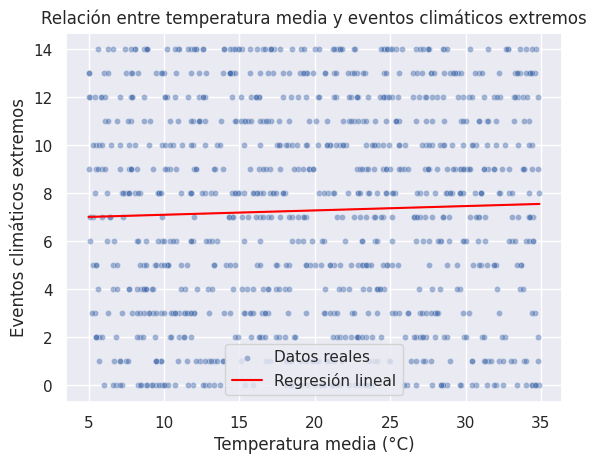

In [ ]:
lr = LinearRegression()
independiente = df_regresion[['temperatura_media(°C)']]
dependiente = df_regresion['eventos_climaticos_extremos']

lr.fit(independiente, dependiente)
y_predict = lr.predict(independiente)

sns.scatterplot(x=independiente.values.ravel(), y=dependiente, s=20,alpha=0.5,label="Datos reales");
sns.lineplot(x=independiente.values.ravel(), y=y_predict, color='red',label="Regresión lineal");
plt.xlabel("Temperatura media (°C)")
plt.ylabel("Eventos climáticos extremos")
plt.title("Relación entre temperatura media y eventos climáticos extremos")
plt.legend()
plt.show()

In [ ]:
#Coeficiente del modelo entrenado
lr.score(independiente, dependiente)

0.0012215904103894948

In [ ]:
#Regresión lineal temperatura media global -> aumento del nivel del mar
df_regresion = df[['temperatura_media(°C)', 'aumento_del_nivel_del_mar(mm)']]
df.isna().sum()
df_regresion = df_regresion[df_regresion > 0]
df_regresion = df.dropna()
#Coeficiente de Correlación
df_regresion['temperatura_media(°C)'].corr(df_regresion['aumento_del_nivel_del_mar(mm)'])

0.059005083316739496

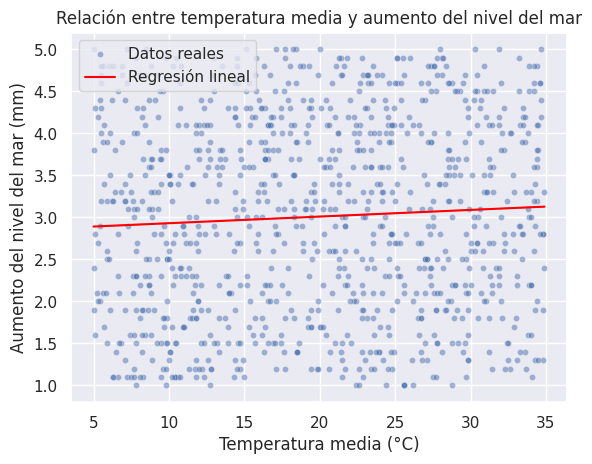

In [ ]:
lr = LinearRegression()
independiente = df_regresion[['temperatura_media(°C)']]
dependiente = df_regresion['aumento_del_nivel_del_mar(mm)']

lr.fit(independiente, dependiente)
y_predict = lr.predict(independiente)

sns.scatterplot(x=independiente.values.ravel(), y=dependiente, s=20,alpha=0.5,label="Datos reales");
sns.lineplot(x=independiente.values.ravel(), y=y_predict, color='red',label="Regresión lineal");
plt.xlabel("Temperatura media (°C)")
plt.ylabel("Aumento del nivel del mar (mm)")
plt.title("Relación entre temperatura media y aumento del nivel del mar")
plt.legend()
plt.show()

In [ ]:
#Coeficiente del modelo entrenado
lr.score(independiente, dependiente)

0.0034815998572154117

In [ ]:
#Regresión lineal energía renovable -> temperatura media global
df_regresion = df[['energia_renovable(%)', 'temperatura_media(°C)']]
df.isna().sum()
df_regresion = df_regresion[df_regresion > 0]
df_regresion = df.dropna()
#Coeficiente de Correlación
df_regresion['energia_renovable(%)'].corr(df_regresion['temperatura_media(°C)'])

-0.06547188492302168

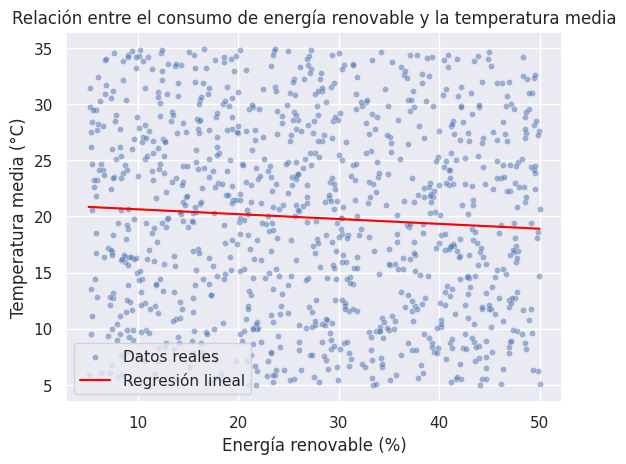

In [ ]:
lr = LinearRegression()
independiente = df_regresion[['energia_renovable(%)']]
dependiente = df_regresion['temperatura_media(°C)']

lr.fit(independiente, dependiente)
y_predict = lr.predict(independiente)

sns.scatterplot(x=independiente.values.ravel(), y=dependiente, s=20,alpha=0.5,label="Datos reales");
sns.lineplot(x=independiente.values.ravel(), y=y_predict, color='red',label="Regresión lineal");
plt.xlabel("Energía renovable (%)")
plt.ylabel("Temperatura media (°C)")
plt.title("Relación entre el consumo de energía renovable y la temperatura media")
plt.legend()
plt.show()

In [ ]:
#Coeficiente del modelo entrenado
lr.score(independiente, dependiente)

0.0042865677153733905

In [ ]:
#Regresión lineal porcentaje de area forestal -> temperatura media global
df_regresion = df[['area_forestal(%)', 'temperatura_media(°C)']]
df.isna().sum()
df_regresion = df_regresion[df_regresion > 0]
df_regresion = df.dropna()
#Coeficiente de Correlación
df_regresion['area_forestal(%)'].corr(df_regresion['temperatura_media(°C)'])

-0.017027454770345514

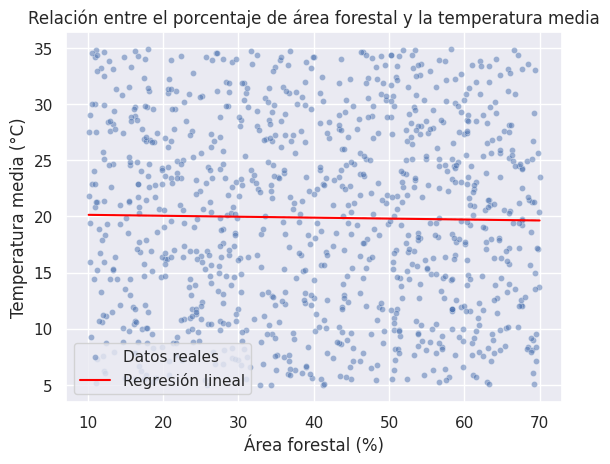

In [ ]:
lr = LinearRegression()
independiente = df_regresion[['area_forestal(%)']]
dependiente = df_regresion['temperatura_media(°C)']

lr.fit(independiente, dependiente)
y_predict = lr.predict(independiente)

sns.scatterplot(x=independiente.values.ravel(), y=dependiente, s=20,alpha=0.5,label="Datos reales");
sns.lineplot(x=independiente.values.ravel(), y=y_predict, color='red',label="Regresión lineal");
plt.xlabel("Área forestal (%)")
plt.ylabel("Temperatura media (°C)")
plt.title("Relación entre el porcentaje de área forestal y la temperatura media")
plt.legend()
plt.show()

In [ ]:
#Coeficiente del modelo entrenado
lr.score(independiente, dependiente)

0.00028993421595602253

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df = pd.read_csv()
df.head()

Year    Country  CO2 Emissions (Tons/Capita)  Forest Area (%)
0  2006         UK                          9.3             59.8
1  2019        USA                          4.8             31.0
2  2014     France                          2.8             35.5
3  2010  Argentina                          1.8             17.7
4  2007    Germany                          5.6             17.4

In [ ]:
#Ver datos de emisions C02 y reforestación

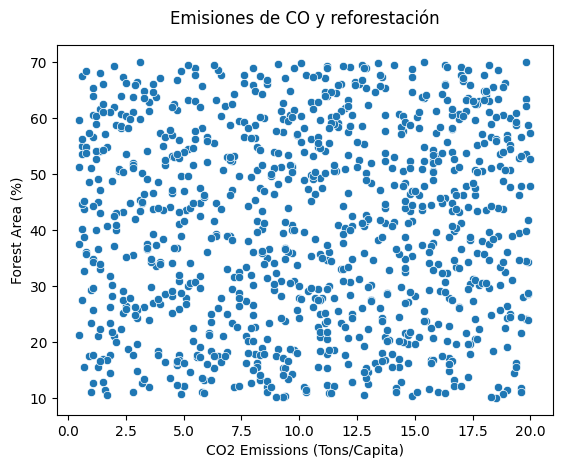

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Emisiones de CO y reforestación', pad=15)
ax.set_xlabel('CO2 Emissions (Tons/Capita)')
ax.set_ylabel('Forest Area (%)')

sns.scatterplot(x=df['CO2 Emissions (Tons/Capita)'], y=df['Forest Area (%)'], ax=ax);

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k_means = KMeans(n_clusters=10, max_iter=10000)

In [ ]:
k_means.fit(df[['CO2 Emissions (Tons/Capita)', 'Forest Area (%)']])

KMeans(max_iter=10000, n_clusters=10)

In [ ]:
centers = k_means.cluster_centers_

centers

array([[ 4.81630435, 63.08478261],
       [ 5.56666667, 26.53444444],
       [15.50319149, 43.32659574],
       [14.85      , 30.68272727],
       [ 5.90576923, 51.47596154],
       [14.68217822, 65.03366337],
       [ 5.021     , 39.246     ],
       [ 6.32912621, 15.1407767 ],
       [15.20196078, 17.61078431],
       [15.28076923, 55.09615385]])

<ipython-input-53-a40cc2d78a82>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df['CO2 Emissions (Tons/Capita)'], y=df['Forest Area (%)'], ax=ax, palette='rainbow');


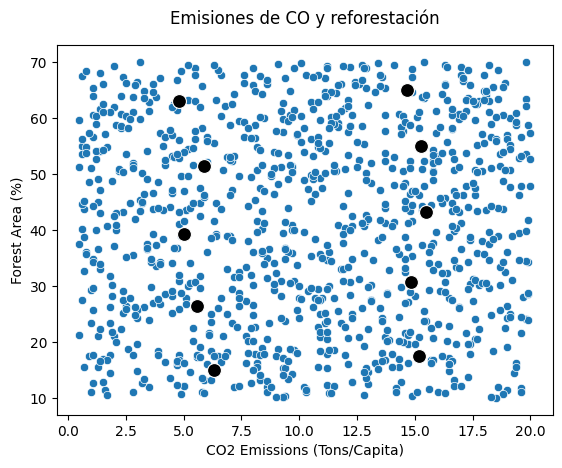

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Emisiones de CO y reforestación', pad=15)
ax.set_xlabel('CO2 Emissions (Tons/Capita)')
ax.set_ylabel('Forest Area (%)')

sns.scatterplot(x=df['CO2 Emissions (Tons/Capita)'], y=df['Forest Area (%)'], ax=ax, palette='rainbow');
sns.scatterplot(x=centers[:,0], y=centers[:,1], ax=ax, s=100, color='black');


In [ ]:
clasificaciones = k_means.predict(df[['CO2 Emissions (Tons/Capita)', 'Forest Area (%)']])

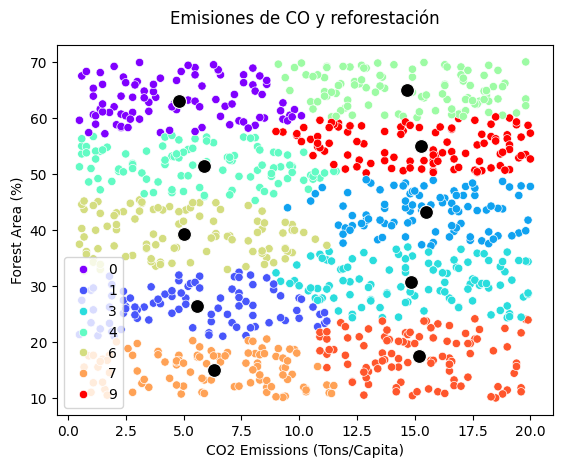

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Emisiones de CO y reforestación', pad=15)
ax.set_xlabel('CO2 Emissions (Tons/Capita)')
ax.set_ylabel('Forest Area (%)')

sns.scatterplot(x=df['CO2 Emissions (Tons/Capita)'], y=df['Forest Area (%)'], ax=ax, hue=clasificaciones, palette='rainbow');
sns.scatterplot(x=centers[:,0], y=centers[:,1], ax=ax, s=100, color='black');